In [1]:
import matplotlib as mpl
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_31070/616493249.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [2]:
from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=9)

width  = 3.487
height = width / 1.618 * 1.0

In [3]:
## thickness scan for maximum cut-off energy

thickness = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/F1-2023/thickness_max_energy_F1.txt',
                      delimiter=',',skiprows=1, usecols=0)

maxi_ene  = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/F1-2023/thickness_max_energy_F1.txt',
                      delimiter=',',skiprows=1, usecols=1)

In [4]:
## average over different thicknesses -- with Excel...

thkn = np.array([  1.5,     3,     6,     8,    10,    12,    15])
avee = np.array([17.35, 45.97, 48.84, 51.35, 44.63, 40.15, 39.55])
mine = np.array([15.60, 40.90, 39.90, 49.10, 40.90, 35.20, 34.00])
maxe = np.array([19.10, 49.10, 54.70, 53.60, 47.90, 45.10, 45.10])

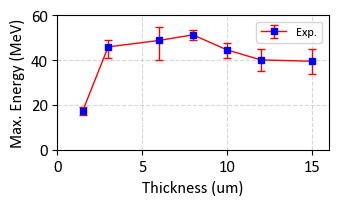

In [5]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

e_err = np.stack([avee - mine, maxe - avee])

ax.errorbar(thkn, avee, yerr=e_err, linewidth=1, 
            # marker='s', 
            markersize=5, 
            marker='s', markerfacecolor='blue', markeredgecolor='blue', linestyle='-', color='red', capsize=3,
            # color='blue', 
            label='Exp.')

ax.set_xlim([0,16])
ax.set_ylim([0,60])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Thickness (um)')
ax.set_ylabel('Max. Energy (MeV)')
ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

plt.show()

In [6]:
fig.savefig('/Users/yao/Desktop/figX_tkn_e.pdf', dpi=600)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
distance   = np.loadtxt('/Users/yao/Desktop/Encircled_Energy_r14,45um.txt',delimiter=' ', usecols=0)
proportion = np.loadtxt('/Users/yao/Desktop/Encircled_Energy_r14,45um.txt',delimiter=' ', usecols=1)

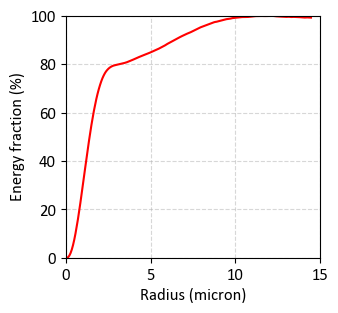

In [16]:
width  = 3.487 * 1.0
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(distance, proportion*100, color='r',lw=1.5,
             linestyle='-',
             # label=r'$n_e$ (100$n_c$)',
           )

ax.set_xlim([0,15])
ax.set_ylim([0,100])
# ax.set_xticks([6,11,16])
# plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel(r'Radius (micron)')
ax.set_ylabel('Energy fraction (%)')
# ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [17]:
fig.savefig('/Users/yao/Desktop/energy_fraction.pdf',dpi=600) # 保存文件

In [19]:
import pandas as pd

fwhm = pd.read_excel('/Users/yao/Nextcloud/PROJECTS/Apollon/F1-2023/Focal Spot scan 20.4.23.xlsx')

In [20]:
z = np.array(fwhm.loc[:,'pos um'])
fx = np.array(fwhm.loc[:,'FWHM_X [um]'])
fy = np.array(fwhm.loc[:,'FWHM_Y [um]'])

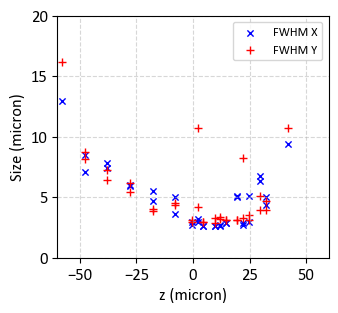

In [22]:
width  = 3.487
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.scatter(z,fx, color='b', marker='x', s=20, lw=1.0,
             # label='PIC at t = {:.1f} fs'.format(tt[-1]),
            label=r'FWHM X',
           )

ax.scatter(z,fy, color='r', marker='+', s=30, lw=1.0,
             # label='PIC at t = {:.1f} fs'.format(tt[-1]),
            label=r'FWHM Y',
           )

ax.set_xlim([-60,60])
ax.set_ylim([0,20])
# plt.title('time = '+str(tt[ts])+' fs')
ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel(r'z (micron)')
ax.set_ylabel(r'Size (micron)')

ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

In [23]:
fig.savefig('/Users/yao/Desktop/focal_line.pdf',dpi=600)

In [7]:
# fig.7 proton energy spectrum

# load experiment data for proton

import numpy as np
data_energy = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/F1-2023/Proton_Spectrum_RCF_MeV_Avg.dat',usecols=0)
data_dnde   = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/F1-2023/Proton_Spectrum_RCF_MeV_Avg.dat',usecols=1)
data_error  = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/F1-2023/Proton_Spectrum_RCF_MeV_Avg.dat',usecols=2)

In [28]:
# get simulation data for proton

import happi

wkdir = [
        '/Users/yao/Documents/Data/LIOR_x4_r*/', # a0=50, Al
        '/Users/yao/Documents/Data/LIOR_x3_r*/', # a0=100, Al
        '/Users/yao/Documents/Data/LIOR_x8/', # a0=100, W, Z=14, density the same
        ]

S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.*np.pi*3e8/0.8e-6)
S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 2.*np.pi*3e8/0.8e-6)
S2 = happi.Open(wkdir[2], reference_angular_frequency_SI = 2.*np.pi*3e8/0.8e-6)

# simu_energy0 = np.array(S0.Screen(0, units=['mm','fs','MeV','cm^-3']).getAxis('ekin')) # MeV
# simu_dnde0   = np.array(S0.Screen(0, units=['mm','fs','MeV','cm^-3']).getData()[-1])   # simulation unit, will be adjusted to experiments

simu_energy0 = np.array(S0.ParticleBinning(3,units=['mm','fs','MeV','cm^-3'],timesteps=14529).getAxis('ekin'))
simu_dnde0   = np.array(S0.ParticleBinning(3,units=['mm','fs','MeV','cm^-3'],timesteps=14529).getData()[0])

simu_energy1 = np.array(S1.Screen(0, units=['mm','fs','MeV','cm^-3']).getAxis('ekin')) # MeV
simu_dnde1   = np.array(S1.Screen(0, units=['mm','fs','MeV','cm^-3']).getData()[-1])   # simulation unit, will be adjusted to experiments

simu_energy2 = np.array(S2.Screen(0, units=['mm','fs','MeV','cm^-3']).getAxis('ekin')) # MeV
simu_dnde2   = np.array(S2.Screen(0, units=['mm','fs','MeV','cm^-3']).getData()[-1])   # simulation unit, will be adjusted to experiments



Loaded simulation '/Users/yao/Documents/Data/LIOR_x4_r0/'
Loaded simulation '/Users/yao/Documents/Data/LIOR_x4_r1/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics
Loaded simulation '/Users/yao/Documents/Data/LIOR_x3_r0/'
Loaded simulation '/Users/yao/Documents/Data/LIOR_x3_r1/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics
Loaded simulation '/Users/yao/Documents/Data/LIOR_x8/'
Scanning for Scalar diagnostics
Scanning for Field diagnost

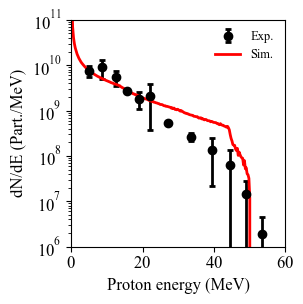

In [30]:
# plot panel (a) with proton energy spectra

width  = 3.14 *1.0
height = width
fig, ax = plt.subplots()

plt.ticklabel_format(axis='both', style='sci',useMathText=True)

fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)
ax.set_yscale('log')

scaling_factor = 7.79e+12  # 2.3e12

ax.errorbar(data_energy,
             data_dnde,
             yerr=data_error, 
             label='Exp.',
             fmt='ok',markersize=6,
             ecolor='k',elinewidth=2.0,
            #  mfc='none',
             capsize=2.0, capthick = 2.0,
            )

ax.plot(simu_energy0,
        simu_dnde0*scaling_factor, 
        label="Sim.",
        linewidth=2.0,
        color='red')

handles, labels = ax.get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend(handles, labels, 
          fancybox=False, reverse=False, frameon=False,
          loc='upper right',
         )

ax.set_xlim([0,60])
ax.set_ylim([1e6, 1e11])
ax.set_xlabel('Proton energy (MeV)')
# ax.set_ylabel(r'$d^2N/(dEd\Omega (MeV^{-1}sr^{-1})$')
ax.set_ylabel(r'dN/dE (Part./MeV)')


fig.set_size_inches(width, height)
fig.tight_layout()

# fig.savefig('/Users/yao/Desktop/Spectrum_RCF.pdf',dpi=600)


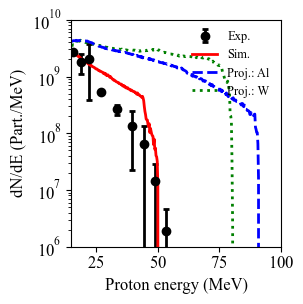

In [32]:
# plot panel (a) with proton energy spectra

width  = 3.14 *1.0
height = width
fig, ax = plt.subplots()

plt.ticklabel_format(axis='both', style='sci',useMathText=True)

fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)
ax.set_yscale('log')

scaling_factor = 7.79e+12  # 2.3e12

ax.errorbar(data_energy,
             data_dnde,
             yerr=data_error, 
             label='Exp.',
             fmt='ok',markersize=6,
             ecolor='k',elinewidth=2.0,
            #  mfc='none',
             capsize=2.0, capthick = 2.0,
            )

ax.plot(simu_energy2,
        simu_dnde2*scaling_factor, 
        label="Proj.: W",
        color='green',
        linewidth=2.0,
        linestyle=':')


ax.plot(simu_energy1,
        simu_dnde1*scaling_factor, 
        label="Proj.: Al",
        color='blue',
        linewidth=2.0,
        linestyle='--')

ax.plot(simu_energy0,
        simu_dnde0*scaling_factor, 
        label="Sim.",
        linewidth=2.0,
        color='red')

handles, labels = ax.get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend(handles, labels, 
          fancybox=False, reverse=False, frameon=False,
          loc='upper right',
         )

ax.set_xlim([15,100])
ax.set_ylim([1e6, 1e10])
ax.set_xlabel('Proton energy (MeV)')
# ax.set_ylabel(r'$d^2N/(dEd\Omega (MeV^{-1}sr^{-1})$')
ax.set_ylabel(r'dN/dE (Part./MeV)')


fig.set_size_inches(width, height)
fig.tight_layout()

# fig.savefig('/Users/yao/Desktop/Spectrum_RCF.pdf',dpi=600)


In [10]:
from lmfit import Model, Parameters, report_fit

def temp(xdata, A, kT):
    return np.exp(-xdata/kT)*A

def fitting(case, start, end):
    gmod = Model(temp)
    gmod.set_param_hint('kT', value=3, vary=True, min=1.0e-2, max=1.0e1)
    gmod.set_param_hint('A', value=3.0, vary=True, min=1.0e-6, max=1.0e2)
    pars = gmod.make_params()
    result = gmod.fit(case[start:end], xdata=xx[start:end], method=fitmethod, nan_policy='omit')
    print(result.fit_report())
    print("kT: ", result.values['kT'])
    print("Reduced chi square: ", result.redchi)
    return result.best_fit, result.values['kT'], result.redchi

In [33]:
# get simulation data for electron

simu_energy_e0 = np.array(S0.Screen(3, units=['mm','fs','MeV','cm^-3']).getAxis('ekin')) # MeV
simu_dnde_e0   = np.array(S0.Screen(3, units=['mm','fs','MeV','cm^-3']).getData()[-1])   # simulation unit, will be adjusted to experiments

ene = S0.Screen(3, units=['um','fs','MeV'],).getData()
xx  = S0.Screen(3, units=['um','fs','MeV']).getAxis('ekin')
tt  = S0.Screen(3, units=['um','fs','MeV']).getTimes()

simu_energy_e1 = np.array(S1.Screen(3, units=['mm','fs','MeV','cm^-3']).getAxis('ekin')) # MeV
simu_dnde_e1   = np.array(S1.Screen(3, units=['mm','fs','MeV','cm^-3']).getData()[-1])   # simulation unit, will be adjusted to experiments

simu_energy_e2 = np.array(S2.Screen(3, units=['mm','fs','MeV','cm^-3']).getAxis('ekin')) # MeV
simu_dnde_e2   = np.array(S2.Screen(3, units=['mm','fs','MeV','cm^-3']).getData()[-1])   # simulation unit, will be adjusted to experiments


In [12]:
start_point = 35  # 5 MeV 
end_point = 110    # 24 MeV
fitmethod =  'leastsq' #'leastsq' #'tnc' 'cg' 'differential_evolution'
ttt = -1

y_ndpm, kT_ndpm, redchi_ndpm = fitting(ene[ttt], start_point, end_point)

[[Model]]
    Model(temp)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 75
    # variables        = 2
    chi-square         = 6.5104e-09
    reduced chi-square = 8.9184e-11
    Akaike info crit   = -1733.55135
    Bayesian info crit = -1728.91637
    R-squared          = 0.99797370
[[Variables]]
    A:   0.00420786 +/- 6.8334e-05 (1.62%) (init = 3)
    kT:  5.34428460 +/- 0.03933769 (0.74%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, kT) = -0.9752
kT:  5.344284597902917
Reduced chi square:  8.91837176334148e-11


In [13]:
start_point2 = 120  # 5 MeV 
end_point2 = 350    # 24 MeV
fitmethod =  'leastsq' #'leastsq' #'tnc' 'cg' 'differential_evolution'
ttt = -1

y_ndpm2, kT_ndpm2, redchi_ndpm2 = fitting(ene[ttt], start_point2, end_point2)

kt = 20
yy = temp(xx[start_point2:end_point2], 1.2e-4, kt)

[[Model]]
    Model(temp)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 95
    # data points      = 230
    # variables        = 2
    chi-square         = 4.0081e-09
    reduced chi-square = 1.7579e-11
    Akaike info crit   = -5693.79904
    Bayesian info crit = -5686.92288
    R-squared          = 0.63065506
[[Variables]]
    A:   7.3183e-04 +/- 1.3467e-04 (18.40%) (init = 3)
    kT: 10.00000000 +/- 0.14073377 (1.41%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, kT) = +0.9900
kT:  9.999999999993008
Reduced chi square:  1.7579184591901424e-11


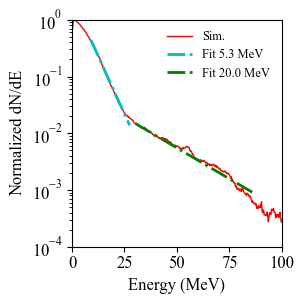

In [14]:
width  = 3.14 *1.0
height = width

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xx,ene[ttt]/ene[ttt].max(), color='r',lw=1.0,
             linestyle='-',
             label='Sim.',
           )

ax.semilogy(xx[start_point:end_point], y_ndpm/ene[ttt].max(), 
            '-.c', linewidth=2.0, markersize=6, 
            mfc='none',mew=1, 
            label='Fit {:.1f} MeV'.format(kT_ndpm))

ax.semilogy(xx[start_point2:end_point2], yy/ene[ttt].max(), 
            '-.g', linewidth=2.0, markersize=6, 
            mfc='none',mew=1, 
            label='Fit {:.1f} MeV'.format(kt))


ax.set_xlim([0,100])
ax.set_ylim([1e-4,1e0])
# ax.set_yticks([1, 1e-2, 1e-4])
# plt.title('time = '+str(tt[ts])+' fs')
# ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('Normalized dN/dE')

ax.legend(fancybox=False, frameon=False)
fig.set_size_inches(width, height)
fig.tight_layout()

# fig.savefig('/Users/yao/Desktop/spec_e.pdf',dpi=600)

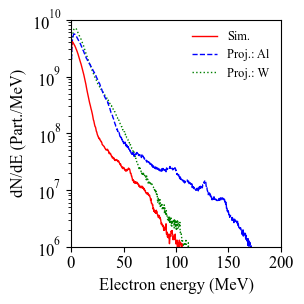

In [45]:
# plot panel (b) with electron energy spectra

width  = 3.14 *1.0
height = width
fig, ax = plt.subplots()

plt.ticklabel_format(axis='both', style='sci',useMathText=True)

fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)
ax.set_yscale('log')

ax.plot(simu_energy_e2,
        simu_dnde_e2*2.3e+12, 
        label="Proj.: W",
        color='green',
        linewidth=1,
        linestyle=':')

ax.plot(simu_energy_e1,
        simu_dnde_e1*2.3e+12, 
        label="Proj.: Al",
        color='blue',
        linewidth=1,
        linestyle='--')

ax.plot(simu_energy_e0,
        simu_dnde_e0*2.3e+12, 
        label="Sim.",
        linewidth=1,
        color='red')

handles, labels = ax.get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend(handles, labels, 
          fancybox=False, reverse=False, frameon=False
         )

ax.set_xlim([0,200])
ax.set_ylim([1e6, 1e10])
ax.set_xlabel('Electron energy (MeV)')
# ax.set_ylabel(r'$d^2N/(dEd\Omega (MeV^{-1}sr^{-1})$')
ax.set_ylabel(r'dN/dE (Part./MeV)')

fig.set_size_inches(width, height)
fig.tight_layout()

fig.savefig('/Users/yao/Desktop/spectra_electron2.pdf',dpi=600)

In [14]:
np.loadtxt('/Users/yao/Desktop/wizzler_data_time_profile_log.txt',delimiter=',',usecols=0)

array([-280.2, -274.2, -262.2, -257.4, -249. , -241.8, -238.2, -237. ,
       -235.8, -232.2, -230.4, -225. , -216.6, -209.4, -202.8, -195. ,
       -192. , -187.8, -186. , -184.2, -180.6, -175.8, -173.4, -169.8,
       -167.4, -164.4, -157.8, -153.6, -144.6, -135. , -129.6, -121.8,
       -114.6, -102.6,  -90.6,  -85.8,  -82.2,  -78.6,  -75. ,  -69. ,
        -61.8,  -57.6,  -54. ,  -51. ,  -45.6,  -37.8,  -31.2,  -25.8,
        -22.8,  -18.6,  -14.4,  -10.2,   -4.8,    1.8,    4.2,    8.4,
         12.6,   16.2,   18.6,   22.2,   25.8,   31.8,   46.2,   54.6,
         60. ,   63.6,   66.6,   71.4,   78.6,   88.2,   94.2,  103.8,
        118.2,  127.8,  132.6,  138.6,  145.8,  153.6,  163.8,  177. ,
        187.8,  199.8,  210.6,  220.8,  237. ,  246.6,  255.6,  264.6,
        270.6,  280.2])

In [15]:
axis_time = np.loadtxt('/Users/yao/Desktop/wizzler_data_time_profile_log.txt',delimiter=',',usecols=0)
axis_ampl = np.loadtxt('/Users/yao/Desktop/wizzler_data_time_profile_log.txt',delimiter=',',usecols=1)

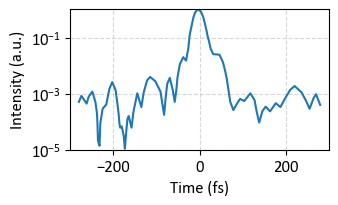

In [35]:
width  = 3.487 * 1.0
height = width / 1.618 * 1.0

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(axis_time, axis_ampl)

ax.set_xlim([-300,300])
# ax.set_xticks([-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250])
# ax.set_xticklabels([-250, -150,  -50,  50,  150,  250])
ax.set_ylim([1e-5,1])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Intensity (a.u.)')
# ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()
plt.savefig('/Users/yao/Desktop/wizzler.pdf',dpi=600) # 保存文件

In [38]:
axis_wl = np.loadtxt('/Users/yao/Desktop/wizzler_data_spectra_profile.txt',delimiter=',',usecols=0)
axis_ampl = np.loadtxt('/Users/yao/Desktop/wizzler_data_spectra_profile.txt',delimiter=',',usecols=1)

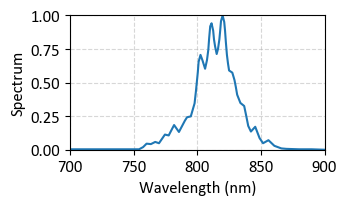

In [43]:
width  = 3.487 * 1.0
height = width / 1.618 * 1.0

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(axis_wl, axis_ampl)

ax.set_xlim([700,900])
# ax.set_xticks([-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250])
# ax.set_xticklabels([-250, -150,  -50,  50,  150,  250])
ax.set_ylim([0,1])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Spectrum')
# ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()
plt.savefig('/Users/yao/Desktop/wizzler_spec.pdf',dpi=600) # 保存文件

In [46]:
# get (and calculate) simulation data for photon from inverse compton scattering (ICS)

def get_calc_photon_spectrum(case):
    P_rad      = np.array(case.RadiationSpectrum(1).getData())
    dgamma     = np.array(case.RadiationSpectrum(1).getAxis('gamma'))
    ene_photon = dgamma*0.511 # [MeV]

    Lx         = case.namelist.Lsim[0]
    Ly         = case.namelist.Lsim[1]
    Prad_unit  = 5.11e5 * 1.6e-19 * 3e10 * 1.1e21 / 0.8 / 6.28 * 1e-4 * 1e-4 # J/s/um [the last 1e-4 is cm->um]

    P_rad_time = np.array(case.RadiationSpectrum(1,units=['s']).getTimes())
    P_rad_dt   = P_rad_time[1] - P_rad_time[0] # s

    U_rad      = np.sum(P_rad,axis=0)*Lx*Ly*Prad_unit/0.511*P_rad_dt

    U_rad_dg   = np.gradient(U_rad, ene_photon)

    return ene_photon, U_rad, U_rad_dg

ene_photon0, U_rad0, U_rad_dg0 = get_calc_photon_spectrum(S0)
ene_photon1, U_rad1, U_rad_dg1 = get_calc_photon_spectrum(S1)
ene_photon2, U_rad2, U_rad_dg2 = get_calc_photon_spectrum(S2)
# ene_photon3, U_rad3, U_rad_dg3 = get_calc_photon_spectrum(S3)

In [47]:
# get theoretical estimate data for photon from Bremstrahlung (Bre)

# the available case (40 J, a0=50, with Al target, Z=3)
# brems0 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/LIOR_2025/ICS_vs_Brems/Bremsstrahlung_Energy_Spectra_a50_Al.txt',skiprows=1)
brems0 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/LIOR_2025/ICS_vs_Brems/Brem_Al_3_a50.txt',skiprows=1)

# the promised case (140 J, a0=100, with Al target, Z=3)
# brems1 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/LIOR_2025/ICS_vs_Brems/Bremsstrahlung_Energy_Spectrum_a100_Al.txt',skiprows=1)
brems1 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/LIOR_2025/ICS_vs_Brems/Brem_Al_3_a100.txt',skiprows=1)

# the promised case (140 J, a0=100, with W target, Z=14)
brems2 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/LIOR_2025/ICS_vs_Brems/Brem_W_14_a100.txt',skiprows=1)

In [48]:
# to have a sum of the ICS and the Brems, we need to do interpolation

from scipy.interpolate import interp1d

common_energy = np.linspace(0.1, 100, 1000)  # 1000 points from 0.1 MeV to 100 MeV

interp_spectrum_ICS2 = interp1d(ene_photon2, U_rad2*3,      kind='cubic', fill_value="extrapolate")
interp_spectrum_Bre2 = interp1d(brems2[:,0], brems2[:,1]*3, kind='cubic', fill_value="extrapolate")

common_spectrum_ICS2 = interp_spectrum_ICS2(common_energy)
common_spectrum_ICS2[common_spectrum_ICS2<0] = 0
common_spectrum_Bre2 = interp_spectrum_Bre2(common_energy)
common_spectrum_Bre2[common_spectrum_Bre2<0] = 0

interp_spectrum_ICS1 = interp1d(ene_photon1, U_rad1*3,      kind='cubic', fill_value="extrapolate")
interp_spectrum_Bre1 = interp1d(brems1[:,0], brems1[:,1]*3, kind='cubic', fill_value="extrapolate")

common_spectrum_ICS1 = interp_spectrum_ICS1(common_energy)
common_spectrum_ICS1[common_spectrum_ICS1<0] = 0
common_spectrum_Bre1 = interp_spectrum_Bre1(common_energy)
common_spectrum_Bre1[common_spectrum_Bre1<0] = 0


interp_spectrum_ICS0 = interp1d(ene_photon0, U_rad0*3,      kind='cubic', fill_value="extrapolate")
interp_spectrum_Bre0 = interp1d(brems0[:,0], brems0[:,1]*3, kind='cubic', fill_value="extrapolate")

common_spectrum_ICS0 = interp_spectrum_ICS0(common_energy)
common_spectrum_ICS0[common_spectrum_ICS0<0] = 0
common_spectrum_Bre0 = interp_spectrum_Bre0(common_energy)
common_spectrum_Bre0[common_spectrum_Bre0<0] = 0

total_spectrum_2 = common_spectrum_ICS2 + common_spectrum_Bre2
total_spectrum_1 = common_spectrum_ICS1 + common_spectrum_Bre1
total_spectrum_0 = common_spectrum_ICS0 + common_spectrum_Bre0


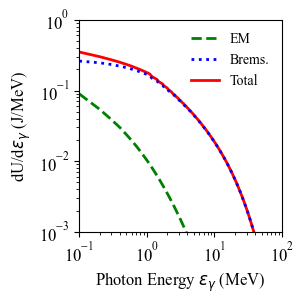

In [27]:
# plot photon energy spectra

width  = 3.14 *1.0
height = width
fig, ax = plt.subplots()

plt.ticklabel_format(axis='both', style='sci',useMathText=True)

fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)
ax.set_yscale('log')
ax.set_xscale('log')


ax.plot(common_energy,
        total_spectrum_0, 
        label="Total",
        # label=r"$a_0=100$: Brems.",
        linestyle='-',
        linewidth=2.0,
        color='red')

ax.plot(common_energy,
        common_spectrum_Bre0,  
        label="Brems.",
        # label=r"$a_0=50$: Brems.",
        linestyle=':',
        linewidth=2.0,
        color='blue')

ax.plot(common_energy,
        common_spectrum_ICS0, 
        label="EM",
        linestyle='--',
        linewidth=2.0,
        # label=r"$a_0=50$: ICS",
        color='green')

handles, labels = ax.get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend(handles, labels, 
          fancybox=False, reverse=False, frameon=False, fontsize=10
         )

ax.set_xlim([0.1, 100])
ax.set_ylim([1e-3,1])
ax.set_xlabel(r'Photon Energy $\varepsilon_{\gamma}$ (MeV)')
ax.set_ylabel(r'dU/d$\varepsilon_{\gamma}$ (J/MeV)')

fig.set_size_inches(width, height)
fig.tight_layout()

fig.savefig('/Users/yao/Desktop/spectra_photon.pdf',dpi=600)


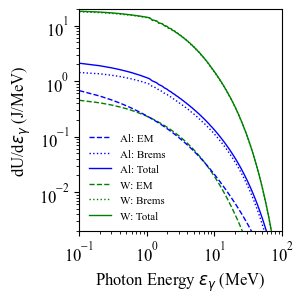

In [57]:
# plot panel (c) with photon energy spectra

width  = 3.14 *1.0
height = width
fig, ax = plt.subplots()

plt.ticklabel_format(axis='both', style='sci',useMathText=True)

fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)
ax.set_yscale('log')
ax.set_xscale('log')

ax.plot(common_energy,
        total_spectrum_2, 
        label="W: Total",
        # label=r"$a_0=100$: Brems.",
        linestyle='-',
        linewidth=1.0,
        color='green')

ax.plot(common_energy,
        common_spectrum_Bre2,  
        label="W: Brems",
        linewidth=1.0,
        # label=r"$a_0=50$: Brems.",
        linestyle=':',
        color='green')

ax.plot(common_energy,
        common_spectrum_ICS2, 
        linewidth=1.0,
        label="W: EM",
        linestyle='--',
        # label=r"$a_0=50$: ICS",
        color='green')

ax.plot(common_energy,
        total_spectrum_1, 
        label="Al: Total",
        # label=r"$a_0=100$: Brems.",
        linestyle='-',
        linewidth=1.0,
        color='blue')

ax.plot(common_energy,
        common_spectrum_Bre1, 
        label="Al: Brems",
        linewidth=1.0,
        # label=r"$a_0=100$: Brems.",
        linestyle=':',
        color='blue')

ax.plot(common_energy,
        common_spectrum_ICS1, 
        linewidth=1.0,
        label="Al: EM",
        # label=r"$a_0=100$: ICS",
        color='blue',
        linestyle='--')

# ax.plot(common_energy,
#         total_spectrum_0, 
#         label="Avail. (Al): Total",
#         # label=r"$a_0=100$: Brems.",
#         linestyle='-',
#         linewidth=3.0,
#         color='red')

# ax.plot(common_energy,
#         common_spectrum_Bre0,  
#         label="Avail. (Al): Brems",
#         # label=r"$a_0=50$: Brems.",
#         linestyle=':',
#         color='red')

# ax.plot(common_energy,
#         common_spectrum_ICS0, 
#         label="Avail. (Al): EM",
#         linestyle='--',
#         # label=r"$a_0=50$: ICS",
#         color='red')

handles, labels = ax.get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend(handles, labels, 
          fancybox=False, reverse=False, frameon=False, fontsize=8
         )

ax.set_xlim([0.1, 100])
ax.set_ylim([2e-3,20])
ax.set_xlabel(r'Photon Energy $\varepsilon_{\gamma}$ (MeV)')
ax.set_ylabel(r'dU/d$\varepsilon_{\gamma}$ (J/MeV)')

fig.set_size_inches(width, height)
fig.tight_layout()

fig.savefig('/Users/yao/Desktop/spectra_photon_pros.pdf',dpi=600)
